In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
amazon_reviews_df= pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
#sms_raw = pd.read_csv(reviews, delimiter= '\t', header=None)
amazon_reviews_df.columns = ['review_text', 'review_status']

#0 = bad review, 1 = good review 

print(amazon_reviews_df)

                                           review_text  review_status
0    So there is no way for me to plug it in here i...              0
1                          Good case, Excellent value.              1
2                               Great for the jawbone.              1
3    Tied to charger for conversations lasting more...              0
4                                    The mic is great.              1
5    I have to jiggle the plug to get it to line up...              0
6    If you have several dozen or several hundred c...              0
7          If you are Razr owner...you must have this!              1
8                  Needless to say, I wasted my money.              0
9                     What a waste of money and time!.              0
10                     And the sound quality is great.              1
11   He was very impressed when going from the orig...              1
12   If the two were seperated by a mere 5+ ft I st...              0
13                  

In [3]:
keywords = ['refund', 'return', 'garbage', 'negative', 'painful', 'not match', 'problem',
            'do not', 'junk', 'dissapointed', 'dissapoint','waste', 'wasted', 'time', 'fooled',  
            'problem', 'died', 'dead', 'dying' 'broke', 'breaks', 'broken', 'don\'t', 'won\'t',
            'will not', 'zero', 'hate', 'terrible', 'do not buy', 'too quiet', 'can\'t hear',
           'useless', 'crap', 'echo', 'plastic', 'unreliable', 'chinese', 'bad', 'not enough', 'badly', 'lousy',
           'wouldn\'t','couldn\'t', 'not', 'worst', 'crappy']



for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_reviews_df[str(key)] = amazon_reviews_df.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
    amazon_reviews_df['allcaps'] = amazon_reviews_df.review_text.str.isupper()

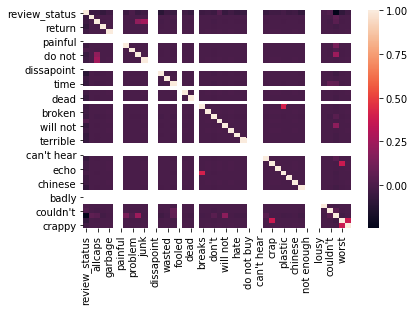

In [4]:
sns.heatmap(amazon_reviews_df.corr())

In [5]:
data = amazon_reviews_df[keywords + ['allcaps']]
target = amazon_reviews_df['review_status']

In [6]:
# data is biinary so use BernoulliNB function from sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB


amazon_review_model = BernoulliNB()

# Fit our model to the data.
amazon_review_model.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = amazon_review_model.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print("Predictive accuracy is : {}%".format(
    amazon_review_model.score(data, target) * 100
))

Number of mislabeled points out of a total 1000 points : 366
Predictive accuracy is : 63.4%


## Test on other model

In [7]:
# Grab and process the raw data.
yelp_reviews_df= pd.read_csv('yelp_labelled.txt', sep='\t', header=None)
#sms_raw = pd.read_csv(reviews, delimiter= '\t', header=None)
yelp_reviews_df.columns = ['review_text', 'review_status']

#0 = bad review, 1 = good review 

print(yelp_reviews_df)

                                           review_text  review_status
0                             Wow... Loved this place.              1
1                                   Crust is not good.              0
2            Not tasty and the texture was just nasty.              0
3    Stopped by during the late May bank holiday of...              1
4    The selection on the menu was great and so wer...              1
5       Now I am getting angry and I want my damn pho.              0
6                Honeslty it didn't taste THAT fresh.)              0
7    The potatoes were like rubber and you could te...              0
8                            The fries were great too.              1
9                                       A great touch.              1
10                            Service was very prompt.              1
11                                  Would not go back.              0
12   The cashier had no care what so ever on what I...              0
13   I tried the Cap

In [105]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_reviews_df[str(key)] = yelp_reviews_df.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
    yelp_reviews_df['allcaps'] = yelp_reviews_df.review_text.str.isupper()
    
#setup data for model

yelpdata = yelp_reviews_df[keywords + ['allcaps']]
yelptarget = yelp_reviews_df['review_status']

#run model

yelp_review_model = BernoulliNB()

# Fit our model to the data.
yelp_review_model.fit(yelpdata, yelptarget)

# Classify, storing the result in a new variable.
yelp_y_pred = yelp_review_model.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points for Yelp reviews : {}".format(
    data.shape[0],
    (target != yelp_y_pred).sum()
))

print("Predictive accuracy for Yelp reviews is : {}%".format(
    yelp_review_model.score(data, target) * 100
))

from sklearn.metrics import confusion_matrix
amazon_cm_df=pd.DataFrame(confusion_matrix(target, y_pred))

goodneg=(amazon_cm_df.iloc[0].loc[0])
goodpos=(amazon_cm_df.iloc[1].loc[1])
falseneg=(amazon_cm_df.iloc[0].loc[1])
falsepos=(amazon_cm_df.iloc[1].loc[0])

sensitivity=(goodpos/(goodpos+falsepos))

specificity=(goodneg/(goodneg+falseneg))

print(amazon_cm_df)

print('sensitivity for Amazon reviews = ' + str(sensitivity*100) + '%')
print('specificity for Amazon reviews= ' + str(specificity*100) + '%')



Number of mislabeled points out of a total 1000 points for Yelp reviews : 390
Predictive accuracy for Yelp reviews is : 61.0%
     0    1
0  161  339
1   27  473
sensitivity for Amazon reviews = 94.6%
specificity for Amazon reviews= 32.2%


It seems we are good at predicting positive reviews but not at predicting negative reviews. Next we should check that assumption by making sure are groups are evenly balanced.


In [26]:
amazon_review_pos_df = amazon_reviews_df[amazon_reviews_df['review_status'] == 1]
amazon_review_neg_df = amazon_reviews_df[amazon_reviews_df['review_status'] == 0]
print(len(amazon_review_pos_df))
print(len(amazon_review_neg_df))

500
500


In [45]:
from sklearn.model_selection import cross_val_score
amazon_crossval_scores=pd.DataFrame(cross_val_score(amazon_review_model, data, target, cv=9))

print(amazon_crossval_scores.describe())

print(.589/.622)
print(.661/.622)

              0
count  9.000000
mean   0.621988
std    0.027224
min    0.589286
25%    0.590909
50%    0.625000
75%    0.636364
max    0.660714
0.9469453376205788
1.0627009646302252


# Writeup

I tried to incorporate function words such as 'not' and conditional verbs like 'would' and 'could' and their respective contractions as I thought these words word come up often. Other than that I included adjectives that seemed to pop up often. The predictive accuracy is about the same. I have about a 12% alpha with respect to a coin flip. I wonder what the upper limit of predictive power of this model,in this context is?

With regards to the evaluation and validation; My model shows has 94.6% sensitivity and 32.3% specificity. The cross validation shows a maximum variance of about 6% of the total predictive effect size in both directions, accordingly it can be assumed that the model is neither over nor under fit.

Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

Do any of your classifiers seem to overfit?
Which seem to perform the best? Why?
Which features seemed to be most impactful to performance?

## Classifier iteration 2

In [104]:
amazon_reviews_df2= pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
#sms_raw = pd.read_csv(reviews, delimiter= '\t', header=None)
amazon_reviews_df2.columns = ['review_text', 'review_status']

keywords_2 = [ 'excellent', 'good', 'great', 'love', 'loved' ]



for key in keywords_2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_reviews_df2[str(key)] = amazon_reviews_df2.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
    amazon_reviews_df2['allcaps'] = amazon_reviews_df2.review_text.str.isupper()

#setup data
data2 = amazon_reviews_df2[keywords_2 + ['allcaps']]
target2 = amazon_reviews_df2['review_status']

# data is biinary so use BernoulliNB function from sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB


amazon_review_model_2 = BernoulliNB()

# Fit our model to the data.
amazon_review_model_2.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = amazon_review_model_2.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred2).sum()
))

print("Predictive accuracy is : {}%".format(
    amazon_review_model_2.score(data2, target2) * 100
))

from sklearn.metrics import confusion_matrix
amazon_cm_df2=pd.DataFrame(confusion_matrix(target2, y_pred2))

goodneg2=(amazon_cm_df2.iloc[0].loc[0])
goodpos2=(amazon_cm_df2.iloc[1].loc[1])
falseneg2=(amazon_cm_df2.iloc[0].loc[1])
falsepos2=(amazon_cm_df2.iloc[1].loc[0])

sensitivity2=(goodpos2/(goodpos2+falsepos2))

specificity2=(goodneg2/(goodneg2+falseneg2))

print(amazon_cm_df2)

print('sensitivity for Amazon reviews = ' + str(sensitivity2*100) + '%')
print('specificity for Amazon reviews= ' + str(specificity2*100) + '%')


Number of mislabeled points out of a total 1000 points : 421
Predictive accuracy is : 57.9%
     0   1
0  487  13
1  408  92
sensitivity for Amazon reviews = 18.4%
specificity for Amazon reviews= 97.39999999999999%


This model has a lower sensitivity but a higher specificity. Let's iterate over the original model with the changes made to this model and see how it fares:

## Classifier iteration 3

In [106]:
amazon_reviews_df3= pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
#sms_raw = pd.read_csv(reviews, delimiter= '\t', header=None)
amazon_reviews_df3.columns = ['review_text', 'review_status']

keywords_3 = [ 'excellent', 'good', 'great', 'love', 'loved', 'fine'
             'refund', 'return', 'garbage', 'negative', 'painful', 'not match', 'problem',
            'do not', 'junk', 'dissapointed', 'dissapoint','waste', 'wasted', 'time', 'fooled',  
            'problem', 'died', 'dead', 'dying' 'broke', 'breaks', 'broken', 'don\'t', 'won\'t',
            'will not', 'zero', 'hate', 'terrible', 'do not buy', 'too quiet', 'can\'t hear',
           'useless', 'crap', 'echo', 'plastic', 'unreliable', 'chinese', 'bad', 'not enough', 'badly', 'lousy',
           'wouldn\'t','couldn\'t', 'not', 'worst', 'crappy']



for key in keywords_3:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_reviews_df3[str(key)] = amazon_reviews_df3.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
    amazon_reviews_df3['allcaps'] = amazon_reviews_df3.review_text.str.isupper()

#setup data
data3 = amazon_reviews_df3[keywords_2 + ['allcaps']]
target3 = amazon_reviews_df3['review_status']

# data is biinary so use BernoulliNB function from sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB


amazon_review_model_3 = BernoulliNB()

# Fit our model to the data.
amazon_review_model_3.fit(data3, target3)

# Classify, storing the result in a new variable.
y_pred3 = amazon_review_model_3.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred3).sum()
))

print("Predictive accuracy is : {}%".format(
    amazon_review_model_3.score(data3, target3) * 100
))

from sklearn.metrics import confusion_matrix
amazon_cm_df3=pd.DataFrame(confusion_matrix(target3, y_pred3))

goodneg3=(amazon_cm_df3.iloc[0].loc[0])
goodpos3=(amazon_cm_df3.iloc[1].loc[1])
falseneg3=(amazon_cm_df3.iloc[0].loc[1])
falsepos3=(amazon_cm_df3.iloc[1].loc[0])

sensitivity3=(goodpos3/(goodpos3+falsepos3))

specificity3=(goodneg3/(goodneg3+falseneg3))

print(amazon_cm_df3)

print('sensitivity for Amazon reviews = ' + str(sensitivity3*100) + '%')
print('specificity for Amazon reviews= ' + str(specificity3*100) + '%')


Number of mislabeled points out of a total 1000 points : 421
Predictive accuracy is : 57.9%
     0   1
0  487  13
1  408  92
sensitivity for Amazon reviews = 18.4%
specificity for Amazon reviews= 97.39999999999999%


No real difference here. Let's try to add number of words as a feature.

## Classifier iteration 4

Number of mislabeled points out of a total 1000 points : 367
Predictive accuracy is : 63.3%
     0    1
0  159  341
1   26  474
sensitivity for Amazon reviews = 94.8%
specificity for Amazon reviews= 31.8%


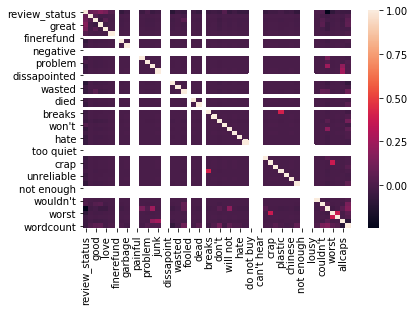

In [103]:
amazon_reviews_df3= pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
#sms_raw = pd.read_csv(reviews, delimiter= '\t', header=None)
amazon_reviews_df3.columns = ['review_text', 'review_status']

keywords_3 = [ 'excellent', 'good', 'great', 'love', 'loved', 'fine'
             'refund', 'return', 'garbage', 'negative', 'painful', 'not match', 'problem',
            'do not', 'junk', 'dissapointed', 'dissapoint','waste', 'wasted', 'time', 'fooled',  
            'problem', 'died', 'dead', 'dying' 'broke', 'breaks', 'broken', 'don\'t', 'won\'t',
            'will not', 'zero', 'hate', 'terrible', 'do not buy', 'too quiet', 'can\'t hear',
           'useless', 'crap', 'echo', 'plastic', 'unreliable', 'chinese', 'bad', 'not enough', 'badly', 'lousy',
           'wouldn\'t','couldn\'t', 'not', 'worst', 'crappy']



for key in keywords_3:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_reviews_df3[str(key)] = amazon_reviews_df3.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
amazon_reviews_df3['allcaps'] = amazon_reviews_df3.review_text.str.isupper()

amazon_reviews_df3['wordcount']=amazon_reviews_df3['review_text'].str.count(' ') + 1

#setup data
data3 = amazon_reviews_df3[keywords_3 + ['allcaps'] + ['wordcount']]
target3 = amazon_reviews_df3['review_status']

# data is biinary so use BernoulliNB function from sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB


amazon_review_model_3 = BernoulliNB()

# Fit our model to the data.
amazon_review_model_3.fit(data3, target3)

# Classify, storing the result in a new variable.
y_pred3 = amazon_review_model_3.predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred3).sum()
))

print("Predictive accuracy is : {}%".format(
    amazon_review_model_3.score(data3, target3) * 100
))

from sklearn.metrics import confusion_matrix
amazon_cm_df3=pd.DataFrame(confusion_matrix(target3, y_pred3))

goodneg3=(amazon_cm_df3.iloc[0].loc[0])
goodpos3=(amazon_cm_df3.iloc[1].loc[1])
falseneg3=(amazon_cm_df3.iloc[0].loc[1])
falsepos3=(amazon_cm_df3.iloc[1].loc[0])

sensitivity3=(goodpos3/(goodpos3+falsepos3))

specificity3=(goodneg3/(goodneg3+falseneg3))

print(amazon_cm_df3)

print('sensitivity for Amazon reviews = ' + str(sensitivity3*100) + '%')
print('specificity for Amazon reviews= ' + str(specificity3*100) + '%')


sns.heatmap(amazon_reviews_df3.corr())

This looks like it was initially!! I'm going to try to take out the positive words.

## Classifier Iteration 5

Number of mislabeled points out of a total 1000 points : 366
Predictive accuracy is : 63.4%
     0    1
0  161  339
1   27  473
sensitivity for Amazon reviews = 94.6%
specificity for Amazon reviews= 32.2%


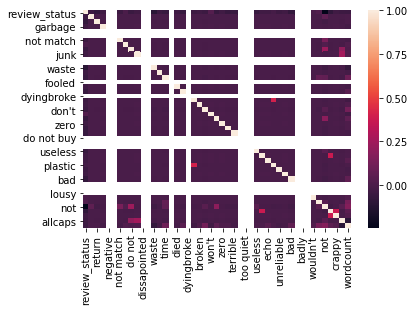

In [109]:
amazon_reviews_df3= pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
#sms_raw = pd.read_csv(reviews, delimiter= '\t', header=None)
amazon_reviews_df3.columns = ['review_text', 'review_status']

keywords_3 = [
             'refund', 'return', 'garbage', 'negative', 'painful', 'not match', 'problem',
            'do not', 'junk', 'dissapointed', 'dissapoint','waste', 'wasted', 'time', 'fooled',  
            'problem', 'died', 'dead', 'dying' 'broke', 'breaks', 'broken', 'don\'t', 'won\'t',
            'will not', 'zero', 'hate', 'terrible', 'do not buy', 'too quiet', 'can\'t hear',
           'useless', 'crap', 'echo', 'plastic', 'unreliable', 'chinese', 'bad', 'not enough', 'badly', 'lousy',
           'wouldn\'t','couldn\'t', 'not', 'worst', 'crappy']



for key in keywords_3:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_reviews_df3[str(key)] = amazon_reviews_df3.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
amazon_reviews_df3['allcaps'] = amazon_reviews_df3.review_text.str.isupper()

amazon_reviews_df3['wordcount']=amazon_reviews_df3['review_text'].str.count(' ') + 1

#setup data
data3 = amazon_reviews_df3[keywords_3 + ['allcaps'] + ['wordcount']]
target3 = amazon_reviews_df3['review_status']

# data is biinary so use BernoulliNB function from sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB


amazon_review_model_3 = BernoulliNB()

# Fit our model to the data.
amazon_review_model_3.fit(data3, target3)

# Classify, storing the result in a new variable.
y_pred3 = amazon_review_model_3.predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred3).sum()
))

print("Predictive accuracy is : {}%".format(
    amazon_review_model_3.score(data3, target3) * 100
))

from sklearn.metrics import confusion_matrix
amazon_cm_df3=pd.DataFrame(confusion_matrix(target3, y_pred3))

goodneg3=(amazon_cm_df3.iloc[0].loc[0])
goodpos3=(amazon_cm_df3.iloc[1].loc[1])
falseneg3=(amazon_cm_df3.iloc[0].loc[1])
falsepos3=(amazon_cm_df3.iloc[1].loc[0])

sensitivity3=(goodpos3/(goodpos3+falsepos3))

specificity3=(goodneg3/(goodneg3+falseneg3))

print(amazon_cm_df3)

print('sensitivity for Amazon reviews = ' + str(sensitivity3*100) + '%')
print('specificity for Amazon reviews= ' + str(specificity3*100) + '%')


sns.heatmap(amazon_reviews_df3.corr())

Again, this is back to what I initially had. Right now, in lieu of creating any more models - I would suggest building 2 seperate models - one optimized for sensitivity and one optimized for specificity. These could be run in tandem and then cross referenced. A third algorithm could investigate the outputs where there is disagreement and give a probabilistic output or label the reviews as ambigious.